In [160]:
import tensorflow as tf
from tensorboard.backend.event_processing import event_accumulator
import os
import matplotlib.pyplot as plt
plt.set_cmap('viridis')
import numpy as np



<Figure size 640x480 with 0 Axes>

# PPO

In [161]:
fp = '/Users/udeshhabaraduwa/Library/CloudStorage/GoogleDrive-u.habaraduwakandambige@tilburguniversity.edu/Mijn Drive/Tilburg/Masters CSAI/Year 1 - Semester 2/Deep RL/Project/tensorboard_logs/parallel_train/PPO_tensorboard_logs'

In [162]:
PPO_files = os.listdir(fp)
PPO_files = [f for f  in PPO_files if 'PPO' in f]

In [163]:
PPO_files

['PPO_33', 'PPO_47', 'PPO_12']

In [164]:
# Path to the log directory
log_dir = '/Users/udeshhabaraduwa/Library/CloudStorage/GoogleDrive-u.habaraduwakandambige@tilburguniversity.edu/Mijn Drive/Tilburg/Masters CSAI/Year 1 - Semester 2/Deep RL/Project/tensorboard_logs/PPO_tensorboard_logs/PPO_12'   # Update this path to match your directory structure

# Initialize event accumulator
event_acc = event_accumulator.EventAccumulator(log_dir)
event_acc.Reload()

# List all available tags
available_tags = event_acc.Tags()

# Print all scalar tags
print("Available scalar tags:")
print(available_tags['scalars'])


Available scalar tags:
['rollout/ep_len_mean', 'rollout/ep_rew_mean', 'time/fps', 'train/approx_kl', 'train/clip_fraction', 'train/clip_range', 'train/entropy_loss', 'train/explained_variance', 'train/learning_rate', 'train/loss', 'train/policy_gradient_loss', 'train/std', 'train/value_loss', 'eval/mean_ep_length', 'eval/mean_reward']


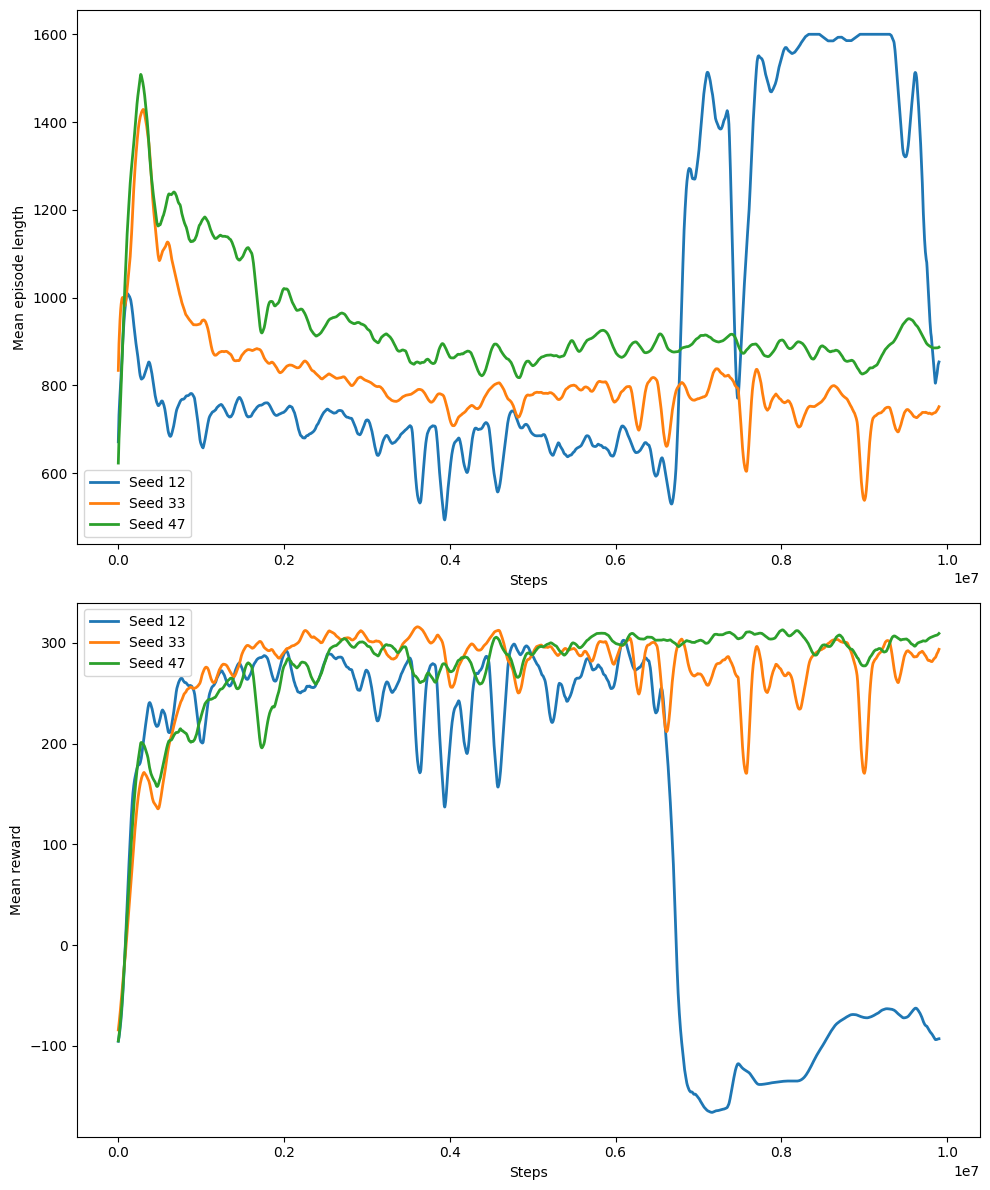

In [165]:
import numpy as np

# Define a moving average function for smoothing
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Define a function to extract and smooth scalar data
def extract_and_smooth_data(log_dir, tag, window_size=50):
    event_acc = event_accumulator.EventAccumulator(log_dir)
    event_acc.Reload()
    scalar_data = event_acc.Scalars(tag)
    steps = [x.step for x in scalar_data]
    values = [x.value for x in scalar_data]
    smoothed_values = moving_average(values, window_size)
    smoothed_steps = steps[:len(smoothed_values)]
    return smoothed_steps, smoothed_values

seeds = [12, 33, 47]
window_size = 50  # Smoothing window size

# Create a figure
plt.figure(figsize=(10, 12))

# Plot all Approx KL on one plot
plt.subplot(2, 1, 1)
for seed in seeds:
    log_dir_ppo = f'/Users/udeshhabaraduwa/Library/CloudStorage/GoogleDrive-u.habaraduwakandambige@tilburguniversity.edu/Mijn Drive/Tilburg/Masters CSAI/Year 1 - Semester 2/Deep RL/Project/tensorboard_logs/PPO_tensorboard_logs/PPO_{seed}'
    steps_kl, values_kl = extract_and_smooth_data(log_dir_ppo, 'rollout/ep_len_mean', window_size)
    plt.plot(steps_kl, values_kl, label=f'Seed {seed}', linewidth=2)
plt.xlabel('Steps')
plt.ylabel('Mean episode length')
plt.legend()

# Plot all Clip Fraction on another plot
plt.subplot(2, 1, 2)
for seed in seeds:
    log_dir_ppo = f'/Users/udeshhabaraduwa/Library/CloudStorage/GoogleDrive-u.habaraduwakandambige@tilburguniversity.edu/Mijn Drive/Tilburg/Masters CSAI/Year 1 - Semester 2/Deep RL/Project/tensorboard_logs/PPO_tensorboard_logs/PPO_{seed}'
    steps, values = extract_and_smooth_data(log_dir_ppo, 'rollout/ep_rew_mean', window_size)
    plt.plot(steps, values, label=f'Seed {seed}' , linewidth=2)
plt.xlabel('Steps')
plt.ylabel('Mean reward')
plt.legend()

plt.tight_layout()
plt.show()


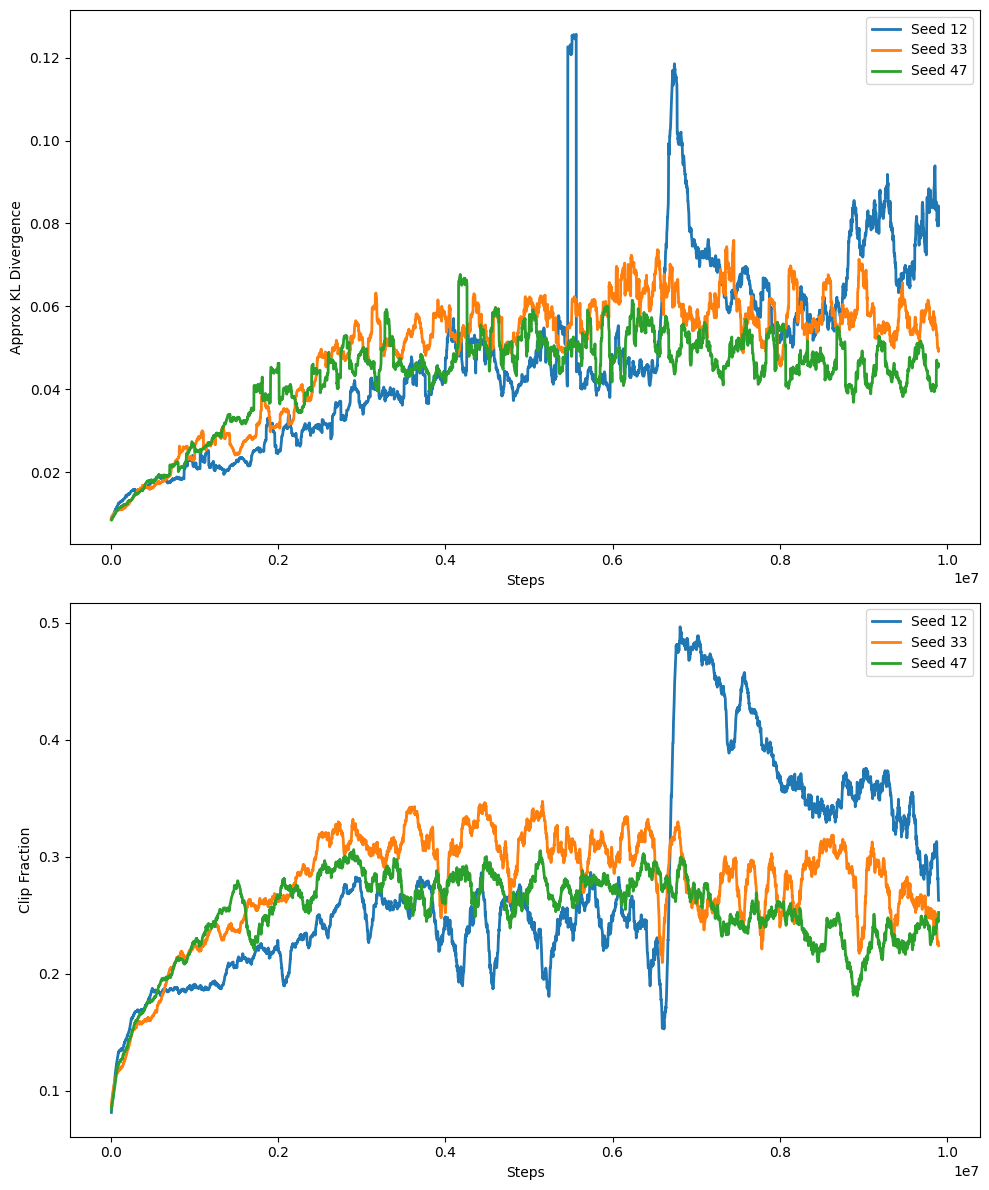

In [166]:
import numpy as np

# Define a moving average function for smoothing
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Define a function to extract and smooth scalar data
def extract_and_smooth_data(log_dir, tag, window_size=50):
    event_acc = event_accumulator.EventAccumulator(log_dir)
    event_acc.Reload()
    scalar_data = event_acc.Scalars(tag)
    steps = [x.step for x in scalar_data]
    values = [x.value for x in scalar_data]
    smoothed_values = moving_average(values, window_size)
    smoothed_steps = steps[:len(smoothed_values)]
    return smoothed_steps, smoothed_values

seeds = [12, 33, 47]
window_size = 50  # Smoothing window size

# Create a figure
plt.figure(figsize=(10, 12))

# Plot all Approx KL on one plot
plt.subplot(2, 1, 1)
for seed in seeds:
    log_dir_ppo = f'/Users/udeshhabaraduwa/Library/CloudStorage/GoogleDrive-u.habaraduwakandambige@tilburguniversity.edu/Mijn Drive/Tilburg/Masters CSAI/Year 1 - Semester 2/Deep RL/Project/tensorboard_logs/PPO_tensorboard_logs/PPO_{seed}'
    steps, values= extract_and_smooth_data(log_dir_ppo, 'train/approx_kl', window_size)
    plt.plot(steps, values, label=f'Seed {seed}', linewidth=2)
plt.xlabel('Steps')
plt.ylabel('Approx KL Divergence')
plt.legend()

# Plot all Clip Fraction on another plot
plt.subplot(2, 1, 2)
for seed in seeds:
    log_dir_ppo = f'/Users/udeshhabaraduwa/Library/CloudStorage/GoogleDrive-u.habaraduwakandambige@tilburguniversity.edu/Mijn Drive/Tilburg/Masters CSAI/Year 1 - Semester 2/Deep RL/Project/tensorboard_logs/PPO_tensorboard_logs/PPO_{seed}'
    steps, values = extract_and_smooth_data(log_dir_ppo, 'train/clip_fraction', window_size)
    plt.plot(steps, values, label=f'Seed {seed}' , linewidth=2)
plt.xlabel('Steps')
plt.ylabel('Clip Fraction')
plt.legend()

plt.tight_layout()
plt.show()


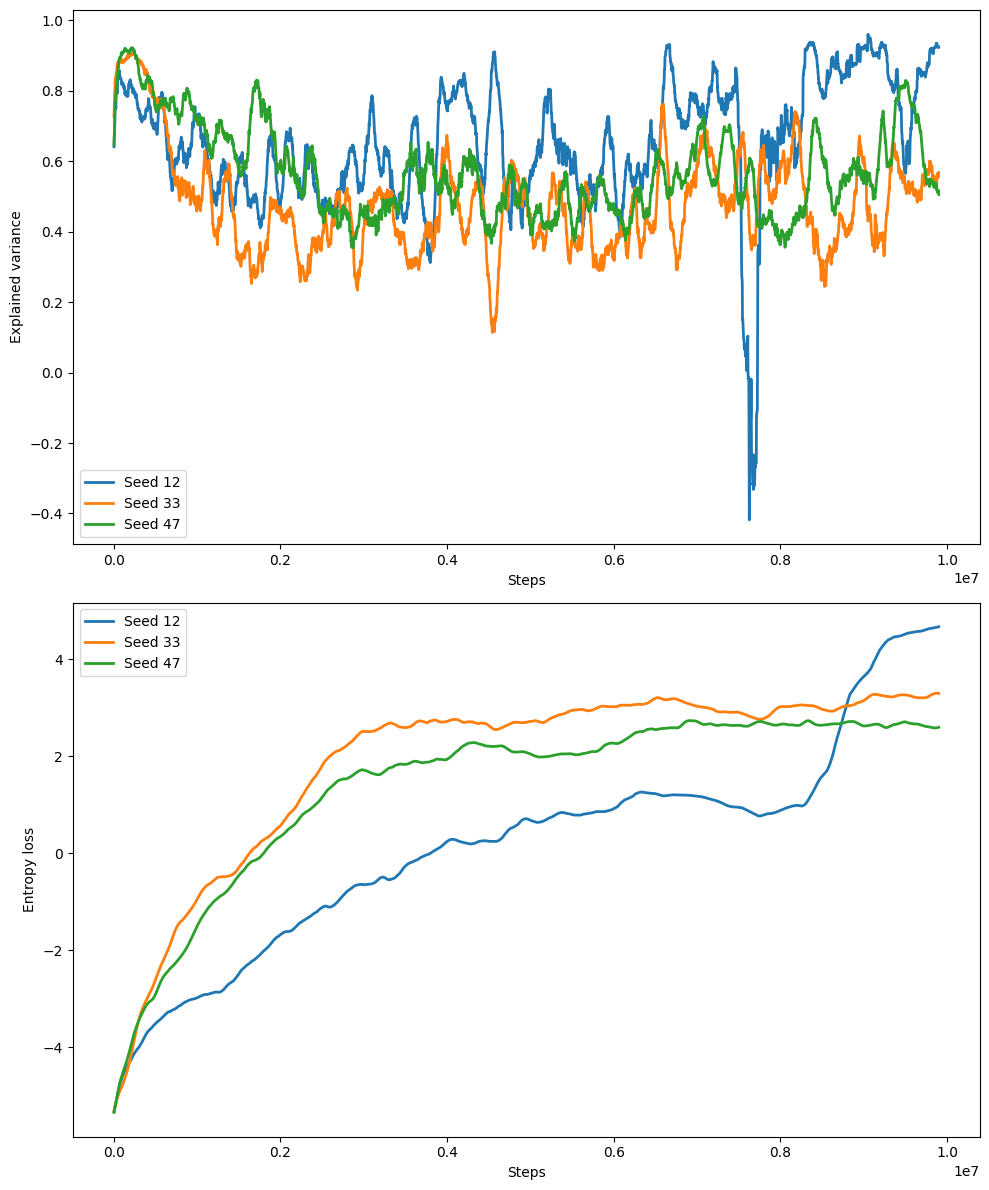

In [167]:
import numpy as np

# Define a moving average function for smoothing
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Define a function to extract and smooth scalar data
def extract_and_smooth_data(log_dir, tag, window_size=50):
    event_acc = event_accumulator.EventAccumulator(log_dir)
    event_acc.Reload()
    scalar_data = event_acc.Scalars(tag)
    steps = [x.step for x in scalar_data]
    values = [x.value for x in scalar_data]
    smoothed_values = moving_average(values, window_size)
    smoothed_steps = steps[:len(smoothed_values)]
    return smoothed_steps, smoothed_values

seeds = [12, 33, 47]
window_size = 50  # Smoothing window size

# Create a figure
plt.figure(figsize=(10, 12))

# Plot all Approx KL on one plot
plt.subplot(2, 1, 1)
for seed in seeds:
    log_dir_ppo = f'/Users/udeshhabaraduwa/Library/CloudStorage/GoogleDrive-u.habaraduwakandambige@tilburguniversity.edu/Mijn Drive/Tilburg/Masters CSAI/Year 1 - Semester 2/Deep RL/Project/tensorboard_logs/PPO_tensorboard_logs/PPO_{seed}'
    steps, values = extract_and_smooth_data(log_dir_ppo, 'train/explained_variance', window_size)
    plt.plot(steps, values, label=f'Seed {seed}', linewidth=2)
plt.xlabel('Steps')
plt.ylabel('Explained variance')
plt.legend()

# Plot all Clip Fraction on another plot
plt.subplot(2, 1, 2)
for seed in seeds:
    log_dir_ppo = f'/Users/udeshhabaraduwa/Library/CloudStorage/GoogleDrive-u.habaraduwakandambige@tilburguniversity.edu/Mijn Drive/Tilburg/Masters CSAI/Year 1 - Semester 2/Deep RL/Project/tensorboard_logs/PPO_tensorboard_logs/PPO_{seed}'
    steps, values = extract_and_smooth_data(log_dir_ppo, 'train/entropy_loss', window_size)
    plt.plot(steps, values, label=f'Seed {seed}' , linewidth=2)
plt.xlabel('Steps')
plt.ylabel('Entropy loss')
plt.legend()

plt.tight_layout()
plt.show()


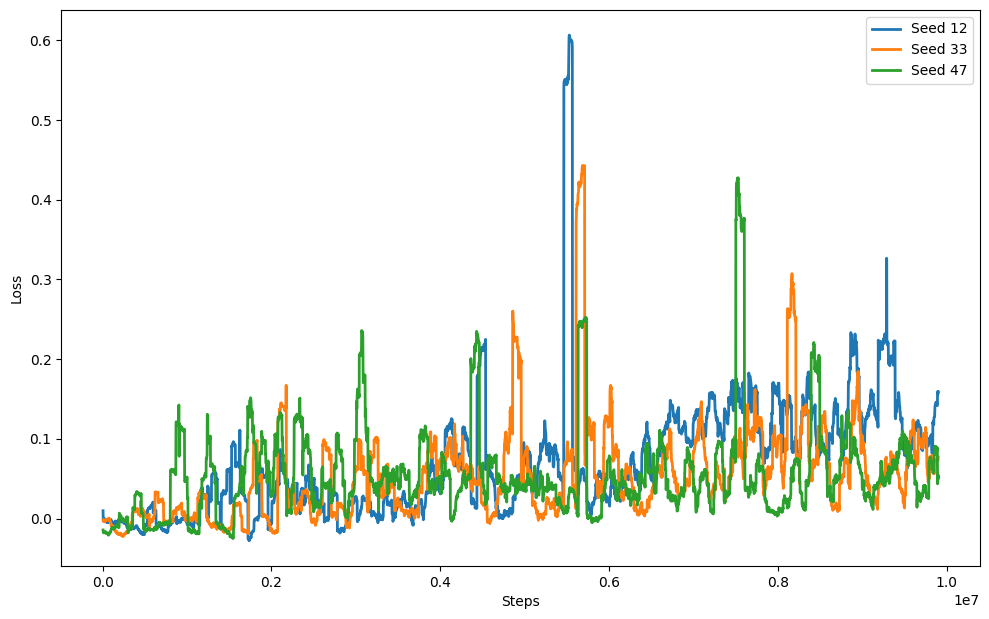

In [168]:
import numpy as np

# Define a moving average function for smoothing
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Define a function to extract and smooth scalar data
def extract_and_smooth_data(log_dir, tag, window_size=50):
    event_acc = event_accumulator.EventAccumulator(log_dir)
    event_acc.Reload()
    scalar_data = event_acc.Scalars(tag)
    steps = [x.step for x in scalar_data]
    values = [x.value for x in scalar_data]
    smoothed_values = moving_average(values, window_size)
    smoothed_steps = steps[:len(smoothed_values)]
    return smoothed_steps, smoothed_values

seeds = [12, 33, 47]
window_size = 50  # Smoothing window size

# Create a figure
plt.figure(figsize=(10, 12))

# Plot all Approx KL on one plot
plt.subplot(2, 1, 1)
for seed in seeds:
    log_dir_ppo = f'/Users/udeshhabaraduwa/Library/CloudStorage/GoogleDrive-u.habaraduwakandambige@tilburguniversity.edu/Mijn Drive/Tilburg/Masters CSAI/Year 1 - Semester 2/Deep RL/Project/tensorboard_logs/PPO_tensorboard_logs/PPO_{seed}'
    steps, values = extract_and_smooth_data(log_dir_ppo, 'train/loss', window_size)
    plt.plot(steps, values, label=f'Seed {seed}', linewidth=2)
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout()
plt.show()


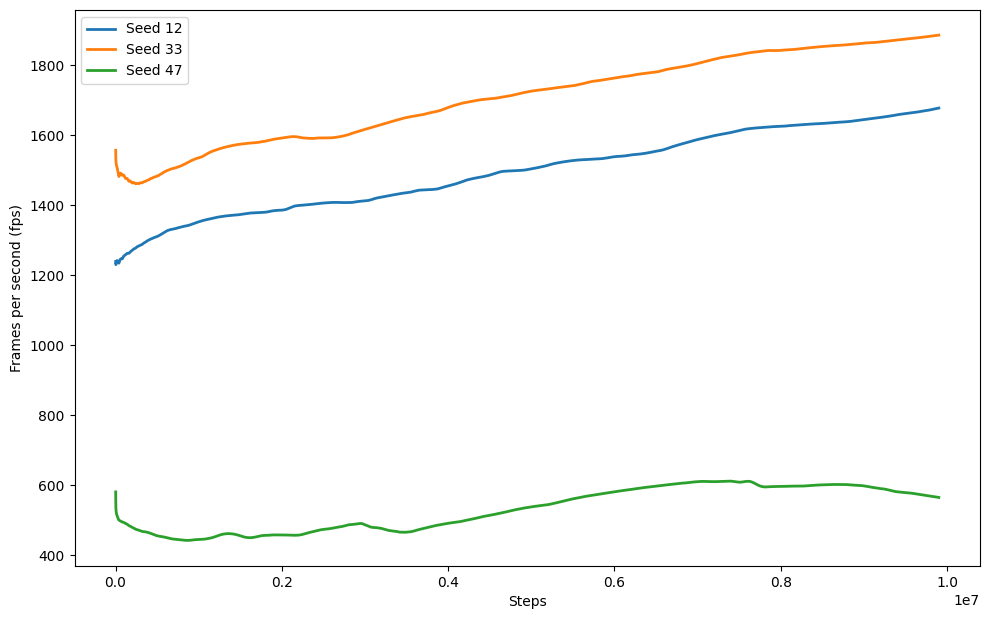

In [170]:
import numpy as np

# Define a moving average function for smoothing
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Define a function to extract and smooth scalar data
def extract_and_smooth_data(log_dir, tag, window_size=50):
    event_acc = event_accumulator.EventAccumulator(log_dir)
    event_acc.Reload()
    scalar_data = event_acc.Scalars(tag)
    steps = [x.step for x in scalar_data]
    values = [x.value for x in scalar_data]
    smoothed_values = moving_average(values, window_size)
    smoothed_steps = steps[:len(smoothed_values)]
    return smoothed_steps, smoothed_values

seeds = [12, 33, 47]
window_size = 50  # Smoothing window size

# Create a figure
plt.figure(figsize=(10, 12))

# Plot all Approx KL on one plot
plt.subplot(2, 1, 1)
for seed in seeds:
    log_dir_ppo = f'/Users/udeshhabaraduwa/Library/CloudStorage/GoogleDrive-u.habaraduwakandambige@tilburguniversity.edu/Mijn Drive/Tilburg/Masters CSAI/Year 1 - Semester 2/Deep RL/Project/tensorboard_logs/PPO_tensorboard_logs/PPO_{seed}'
    steps, values = extract_and_smooth_data(log_dir_ppo, 'time/fps', window_size)
    plt.plot(steps, values, label=f'Seed {seed}', linewidth=2)
plt.xlabel('Steps')
plt.ylabel('Frames per second (fps)')
plt.legend()


plt.tight_layout()
plt.show()
